# SalesPulse: Time Series Analysis & Decomposition
## Notebook 3 of 4

This notebook covers:
1. Resampling data to various temporal granularities
2. Stationarity testing (Augmented Dickey-Fuller)
3. Seasonal decomposition (Trend, Seasonality, Residuals)
4. Autocorrelation analysis (ACF/PACF)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 7)

print("✓ Time series toolkit loaded")

✓ Time series toolkit loaded


## 1. Load and Resample Data
Loading the processed unified sales data and setting the temporal index.

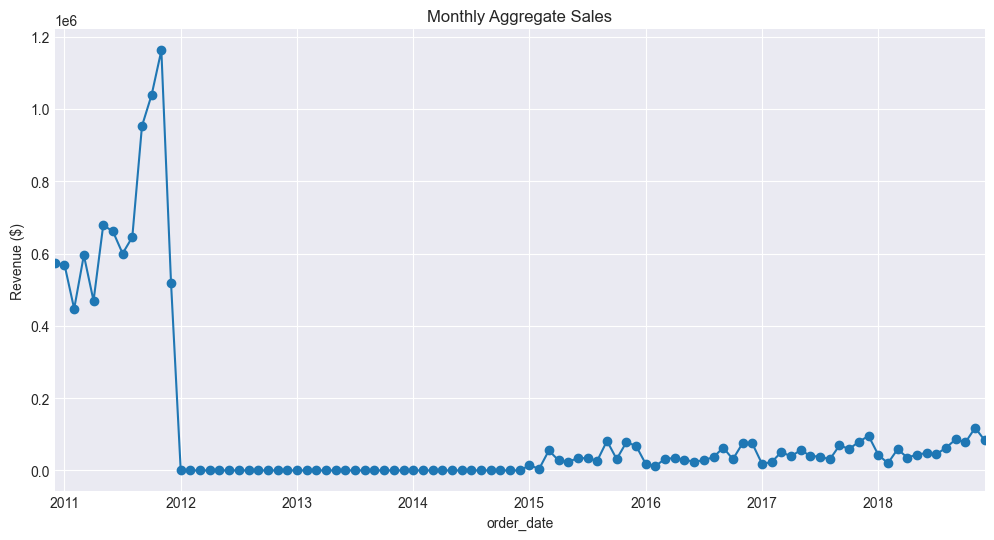

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/cleaned_sales.csv')

df['order_date'] = pd.to_datetime(df['order_date'], format='mixed')

df.set_index('order_date', inplace=True)

daily_sales = df['sales'].resample('D').sum().fillna(0)
monthly_sales = df['sales'].resample('MS').sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Aggregate Sales', marker='o')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

## 2. Stationarity Testing
Using the Augmented Dickey-Fuller (ADF) test to check if the series is stationary.

In [9]:
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print("Stationarity test for Monthly Sales:")
check_stationarity(monthly_sales)

Stationarity test for Monthly Sales:
ADF Statistic: -3.094641
p-value: 0.026952
	1%: -3.504
	5%: -2.894
	10%: -2.584


## 3. Seasonal Decomposition
Extracting Trend and Seasonality components from the monthly data.

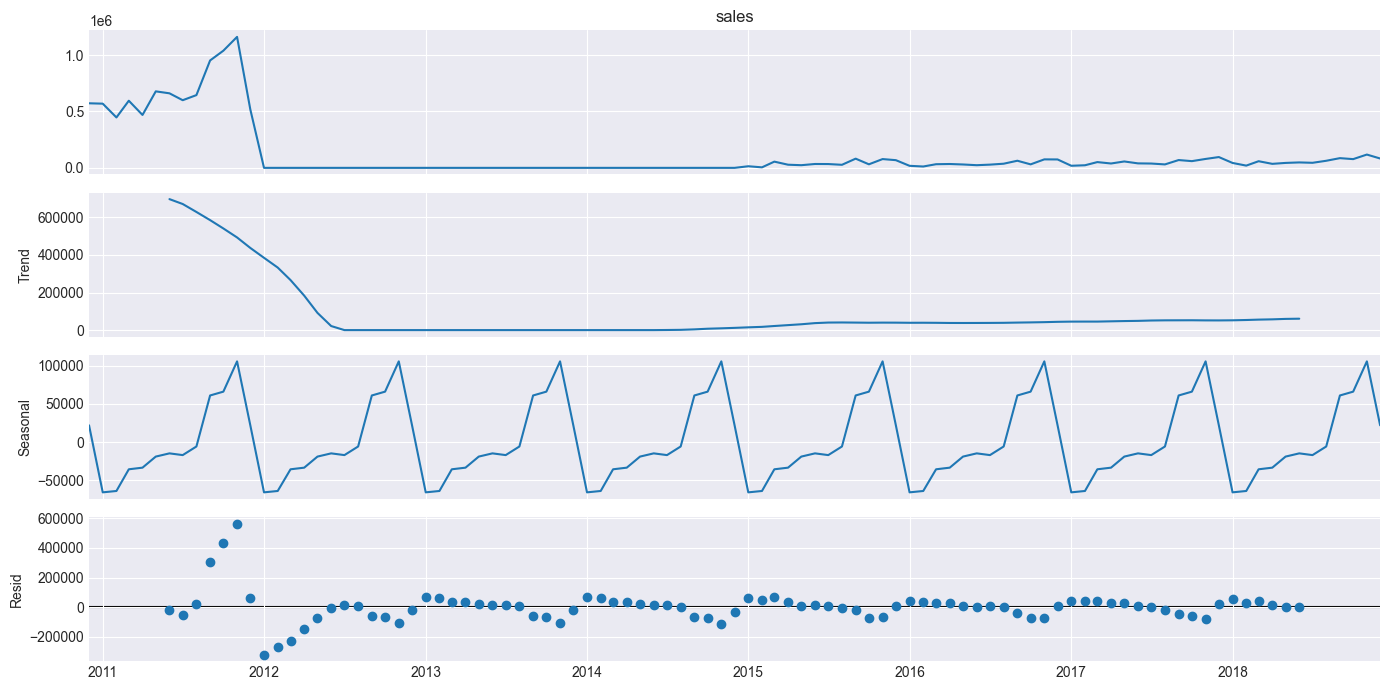

In [10]:
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)
fig = decomposition.plot()
plt.show()

## 4. Growth & Volatility Metrics
Assessing performance trends using insights from the previous project.

In [11]:
avg_monthly = monthly_sales.mean()
peak_month = monthly_sales.idxmax()
volatility = monthly_sales.std()

first_year_avg = monthly_sales.iloc[:12].mean()
last_year_avg = monthly_sales.iloc[-12:].mean()
growth_rate = ((last_year_avg - first_year_avg) / first_year_avg) * 100

print(f"Average Monthly Revenue: ${avg_monthly:,.2f}")
print(f"Annual Growth Rate: {growth_rate:.2f}%")
print(f"Volatility Index: ${volatility:,.2f}")

Average Monthly Revenue: $115,185.00
Annual Growth Rate: -91.40%
Volatility Index: $240,585.08


## 5. ACF and PACF Analysis
Determining the potential p and q parameters for ARIMA modeling.

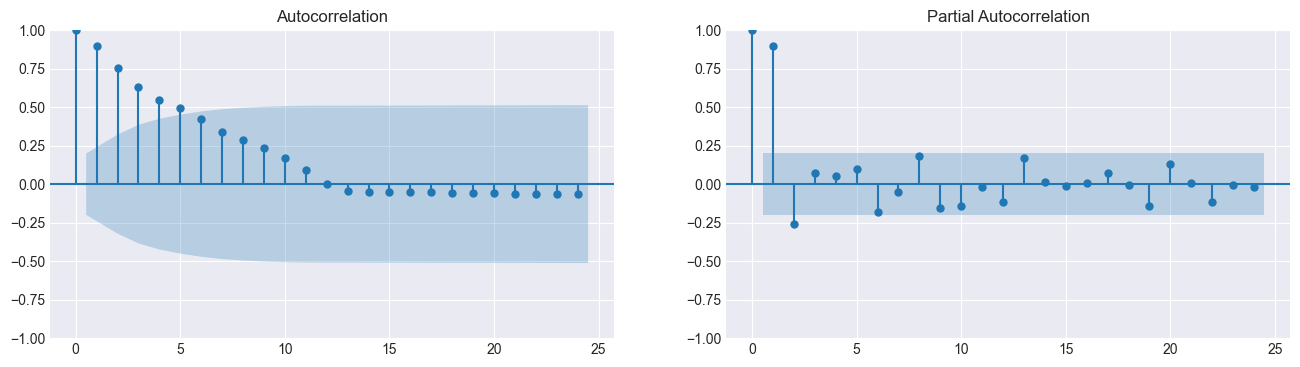

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(monthly_sales, ax=ax1, lags=24)
plot_pacf(monthly_sales, ax=ax2, lags=24)
plt.show()